## Dataset management

This notebook treats the UCI heart disease data (https://archive.ics.uci.edu/ml/datasets/Heart+Disease) to prepare for further analysis. Correlation analysis will be performed to determine which features in the dataset we are interested in for our models.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

#seed = 0
#random.seed(seed); np.random.seed(seed)

import warnings
warnings.filterwarnings('ignore') 

## Importing data

We're using a modified version of the original datasets, featuring measurements from Cleveland, VA Long Beach, Switzerland and Hungary and with associated feature names. This set contains 14 (excluding 'id' in the first column and target value in the last) of the 74 features in the original datasets, which seems to be convention in most literature using the dataset.

csv file: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download

Data preparation procedure inspired by this kaggle notebook: https://www.kaggle.com/code/datafan07/heart-disease-and-some-scikit-learn-magic/notebook#Loading-Data.

In [10]:
# all data accessed on 22.11.22
dataframe = pd.read_csv('heart_disease_uci.csv')

# display 5 random data samples
print(f'Shape of dataset (instances, features): {dataframe.shape}')
print(f'Unique observations: \n{dataframe.nunique()}')
print('\nRandom samples from dataset:')
dataframe.sample(8)

Shape of dataset (instances, features): (920, 16)
Unique observations: 
id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

Random samples from dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
447,448,54,Female,Hungary,atypical angina,140.0,309.0,NaN,st-t abnormality,140.0,False,0.0,NaN,NaN,NaN,0
654,655,56,Male,Switzerland,non-anginal,155.0,0.0,False,st-t abnormality,99.0,False,0.0,flat,NaN,normal,2
416,417,50,Male,Hungary,atypical angina,170.0,209.0,False,st-t abnormality,116.0,False,0.0,NaN,NaN,NaN,0
56,57,50,Male,Cleveland,non-anginal,140.0,233.0,False,normal,163.0,False,0.6,flat,1.0,reversable defect,1
540,541,50,Male,Hungary,asymptomatic,130.0,233.0,False,normal,121.0,True,2.0,flat,NaN,reversable defect,1
426,427,52,Female,Hungary,atypical angina,120.0,210.0,False,normal,148.0,False,0.0,NaN,NaN,NaN,0
75,76,65,Female,Cleveland,non-anginal,160.0,360.0,False,lv hypertrophy,151.0,False,0.8,upsloping,0.0,normal,0
537,538,48,Male,Hungary,asymptomatic,160.0,193.0,False,normal,102.0,True,3.0,flat,NaN,NaN,1


Feature documentation: \
\
-sex (1 = male, 0 = female)\
-cp: chest pain type \
-- Value 1: typical angina \
-- Value 2: atypical angina \
-- Value 3: non-anginal pain \
-- Value 4: asymptomatic \
-trestbps: resting blood pressure (in mm Hg on admission to the hospital)\
-chol: cholesterol measure in mg/dl \
-fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\
-restecg: ecg observation at resting condition \
-- Value 0: normal\
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\
-thalch: maximum heart rate achieved \
-exang: exercise induced angina (1 = yes; 0 = no)\
-oldpeak: ST depression induced by exercise relative to rest\
-slope: the slope of the peak exercise ST segment\
-- Value 1: upsloping\
-- Value 2: flat\
-- Value 3: downsloping\
-ca: number of major vessels (0-3) colored by flourosopy\
-thal: 3 = normal; 6 = fixed defect; 7 = reversable defect\

## Feature correlation analysis

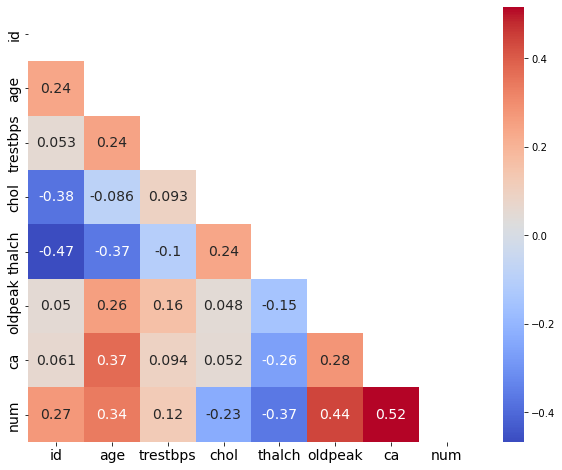

In [13]:
mask = np.triu(dataframe.corr()) #diagonal + upper triangle redundant
plt.figure(figsize=(10,8))
sns.heatmap(dataframe.corr(), mask=mask, cmap='coolwarm', annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.show()